## Applied - Question 14

This problem focuses on the collinearity problem.

Import block

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from statsmodels.graphics.api import plot_leverage_resid2
from statsmodels.graphics.api import qqplot

%matplotlib inline
plt.style.use('seaborn-white')

Setting up the data with $\beta_0 = 2$, $\beta_1 = 2$ and $\beta_2 = 0.3$ with epsilon term

$Y = 2 + 2X_1 + 0.3X_2 + \epsilon$

In [3]:
x1 = np.random.uniform(0, 1, 100)
x2 = 0.5*x1 + np.random.normal(0, 1, 100)/10
y = 2 + 2*x1 + 0.3*x2 + np.random.normal(0, 1, 100)

df = pd.DataFrame({'y':y, 'x1':x1, 'x2':x2})
df.head(5)

,y,x1,x2
0,2.179328,0.013585,0.076891
1,4.887838,0.718269,0.339440
2,2.457760,0.566428,0.322865
3,1.228210,0.042291,0.046575
4,4.528762,0.570263,0.317801


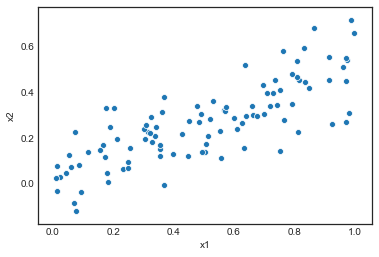

In [4]:
sns.scatterplot(x='x1', y='x2', data=df)

There is a clear correlation/linear relationship between x1 and x2. It is even more apparent 
if we use correlation matrix and heatmap.

           y        x1        x2
y   1.000000  0.493835  0.517867
x1  0.493835  1.000000  0.795738
x2  0.517867  0.795738  1.000000


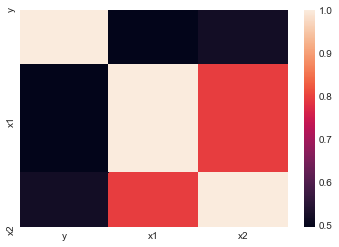

In [5]:
corr = df.corr()
print(corr)
sns.heatmap(corr)

(c) Running a linear regression with y on x1 and x2

In [6]:
model = smf.ols('y ~ x1 + x2', data=df)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     19.47
Date:                Thu, 17 Oct 2019   Prob (F-statistic):           7.81e-08
Time:                        07:25:11   Log-Likelihood:                -139.94
No. Observations:                 100   AIC:                             285.9
Df Residuals:                      97   BIC:                             293.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0180      0.201     10.034      0.000       1.619       2.417
x1             0.8949      0.569      1.574      0.119      -0.234       2.023
x2             2.3021      0.957      2.404      0.018       0.402       4.202
==============================================================================
Omnibus:                        3.060   Durbin-Watson:                   2.118
Prob(Omnibus):                  0.216   Jarque-Bera (JB):                1.902
Skew:                           0.075   Prob(JB):                        0.386
Kurtosis:                       2.341   Cond. No.                         12.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The result is troublesome: while the intercept term is near the true value of 2, both intercepts
are missing the mark with $\hat{\beta}_2$ is way off.

F statistic is quite low even though it is significant.  
The p-value for $\hat{\beta_0}$ and $\hat{\beta_1}$ are near 0 so we can reject null hypothesis.  
However, p-value for $\hat{\beta_2}$ is very large which means it is statistically insignificant or there
is no relationship between y and x2.

(d) Using only x1 we can obtain the following

In [7]:
model = smf.ols('y ~ x1', data=df)
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     31.61
Date:                Thu, 17 Oct 2019   Prob (F-statistic):           1.78e-07
Time:                        07:25:11   Log-Likelihood:                -142.83
No. Observations:                 100   AIC:                             289.7
Df Residuals:                      98   BIC:                             294.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0873      0.204     10.240      0.0

We can still reject the null hypothesis $H_0 : \beta_1 = 0$ with near zero p-value

Repeating the same step with y onto x2

In [8]:
model = smf.ols('y ~ x2', data=df)
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     35.91
Date:                Thu, 17 Oct 2019   Prob (F-statistic):           3.43e-08
Time:                        07:25:11   Log-Likelihood:                -141.20
No. Observations:                 100   AIC:                             286.4
Df Residuals:                      98   BIC:                             291.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1462      0.185     11.583      0.0

We can also now REJECT the null hypothesis $H_0 : \beta_1 = 0$. This is expected as
x1 can be written in x2. However, the model fits a bit worse. (We can see this as looking at the 
2 adjusted R-squared)

Nevertheless, the result in (c) and (e) do NOT contradict each other. What happened here is the 
collinearity masking the effects of predictors on the response.

(g) Adding one more observation

In [12]:
df_add = pd.DataFrame({'y':6, 'x1':0.1, 'x2':0.8}, index=[0])
df = df.append(df_add, ignore_index=True)
df.tail(5)

,y,x1,x2
91,3.367051,0.742671,0.343731
92,4.429988,0.811721,0.225637
93,1.055147,0.321525,0.219170
94,1.316398,0.368632,-0.007178
95,3.148131,0.447272,0.121089
96,3.879981,0.833247,0.593900
97,4.661988,0.515288,0.210149
98,1.446262,0.248000,0.092204
99,3.939219,0.326526,0.291554
100,6.000000,0.100000,0.800000


Repeating 3 regression from (c) to (e).

In [13]:
mod_both = smf.ols('y ~ x1 + x2', data=df).fit()
print(mod_both.summary().tables[1])
mod_x1 = smf.ols('y ~ x1', data=df).fit()
print(mod_x1.summary().tables[1])
mod_x2 = smf.ols('y ~ x2', data=df).fit()
print(mod_x2.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0368      0.203     10.051      0.000       1.635       2.439
x1             0.4016      0.491      0.818      0.415      -0.573       1.376
x2             3.2084      0.797      4.025      0.000       1.626       4.790
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2100      0.213     10.390      0.000       1.788       2.632
x1             1.8100      0.370      4.895      0.000       1.076       2.544
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1098      0.182     11.614      0.000       1.749       2.470
x2             3.6732      0.558      6.581      0.0

Adding out new observation changes the first model completely. x1 becomes 
statistically insignificant with large p-value while x2 is now statistically significant.

In [26]:
# Getting data for the studentized plot
student_resid = []
mod_fitted = []
for mod in [mod_both, mod_x1, mod_x2]:
    student_resid.append(mod.outlier_test()['student_resid'])
    mod_fitted.append(mod.fittedvalues)

0     -0.213531
1      1.545931
2     -0.838610
3     -1.063802
4      1.258081
         ...   
96    -0.417163
97     1.804920
98    -1.009282
99     0.758339
100    0.997940
Name: student_resid, Length: 101, dtype: float64


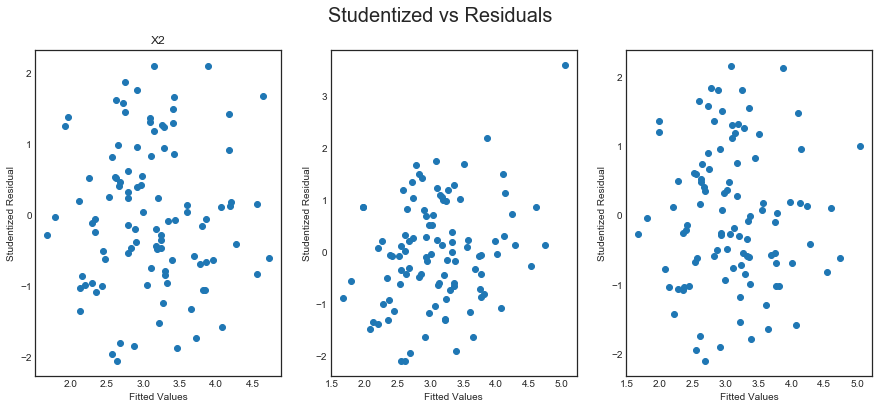

In [33]:
# Residuals vs studentized
fig = plt.figure(figsize=(15,6))
fig.suptitle('Studentized vs Residuals', fontsize=20)

ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.scatter(y=student_resid[0], x=mod_fitted[0])
ax1.set_title('Both')
ax2.scatter(y=student_resid[1], x=mod_fitted[2])
ax1.set_title('X1')
ax3.scatter(y=student_resid[2], x=mod_fitted[2])
ax1.set_title('X2')

for ax in [ax1, ax2, ax3]:
    ax.set(xlabel='Fitted Values', ylabel='Studentized Residual')

For the model with both x1 and x2 and model with only x2, the new observation didn't create 
a new outlier. However, for the model with only x1, it became an outlier with >|3| value.

More important, lets see if the observation is a high leverage point.

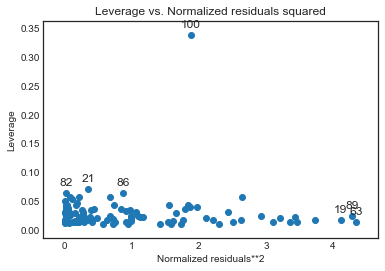

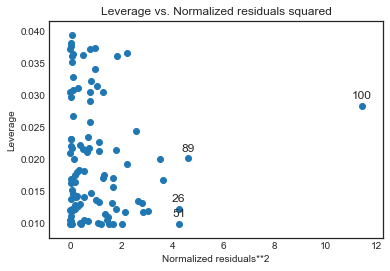

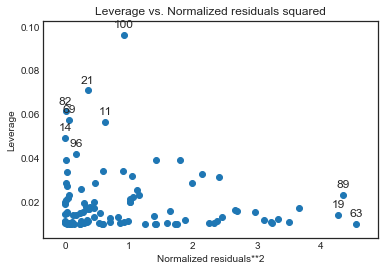

In [34]:
for mod in [mod_both, mod_x1, mod_x2]:
    plot_leverage_resid2(mod)
    

We see the opposite pattern here. For model with both and model with x2 only, the mis-recorded 
observation is clearly a high leverage point. In contrast, it is not so with the model with only x1